## Spam Classification using Machine Learning Algorithms

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

## Dataset Preparation

In [3]:
# load the dataset into the pandas dataframe, display the first 5 records of the dataset
spam_data = pd.read_csv('spambase.data')
spam_data.head()


,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


<p> The dataset does not contain the description about the columns, we have to add them manually to understand them better </p>

In [4]:
# adding column names to the dataset
spam_data.columns = ['word_freq_make', 'word_freq_address',
                      'word_freq_all', 'word_freq_3d', 'word_freq_our', 
                      'word_freq_over', 'word_freq_remove', 'word_freq_internet',
                        'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
                          'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
                            'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
                              'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
                                'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
                                  'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
                                    'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
                                      'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
                                        'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[',
                                          'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
                                            'capital_run_length_total', 'spam']
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


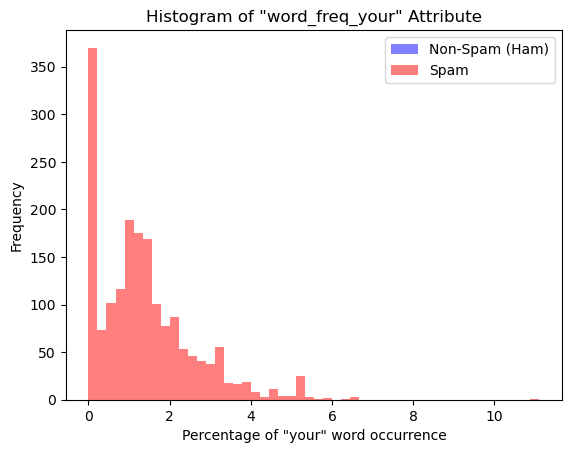

In [20]:
# Create separate data for spam and non-spam (ham) emails
spam_data = spam_data[spam_data['spam'] == 1]
non_spam_data = spam_data[spam_data['spam'] == 0]

# Plot histograms for the "word_freq_your" attribute, grouped by spam or non-spam (ham)
plt.hist(non_spam_data['word_freq_your'], bins=50, alpha=0.5, label='Non-Spam (Ham)', color='blue')
plt.hist(spam_data['word_freq_your'], bins=50, alpha=0.5, label='Spam', color='red')

# Customize the plot
plt.xlabel('Percentage of "your" word occurrence')
plt.ylabel('Frequency')
plt.title('Histogram of "word_freq_your" Attribute')
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [ ]:
# import logistic regression model
from sklearn.linear_model import LogisticRegression
